In [131]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall, Statistics
@pyimport numpy as np
@pyimport scienceplots

In [132]:
# データの読み込み
obs10deg = CSV.read("../MPC/observation/obs_10deg_10ms_EF.csv", DataFrame)
obs20deg = CSV.read("../MPC/observation/obs_20deg_10ms_EF.csv", DataFrame)
obs35deg = CSV.read("../MPC/observation/obs_35deg_10ms_EF.csv", DataFrame)

start_num = 1
end_num = 70
number = end_num - start_num + 1

duration = 50
dt = 0.25
sampling = Int(duration / dt)
whole_step = sampling

data_start = 3
data_end = whole_step
obs_start = 3
obs_end = whole_step

time_list = range(0.00, stop=duration,  step=dt)

plt.style.use(["science", "ieee"])

data1 = []
data2 = []
data3 = []

for q in start_num:end_num   
    push!(data1, CSV.read("../MPC/result/10degL2_10ms/MPC_result$(q).csv", DataFrame))
end

for q in start_num:end_num   
    push!(data2, CSV.read("../MPC/result/20degL2_10ms/MPC_result$(q).csv", DataFrame))
end

for q in start_num:end_num   
    push!(data3, CSV.read("../MPC/result/35degL2_10ms/MPC_result$(q).csv", DataFrame))
end

In [133]:
x_F1 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        x_F1[i,1] = mean([df[i, :X_F] for df in data1[1:number]])
        x_F1[i,2] = median([df[i, :X_F] for df in data1[1:number]])
        x_F1[i,3] = mean([df[i, :X_F]*cos(df[i-1, :ψ]) - df[i, :Y_F]*sin(df[i-1, :ψ]) for df in data1[1:number]])
        x_F1[i,4] = median([df[i, :X_F]*cos(df[i-1, :ψ]) - df[i, :Y_F]*sin(df[i-1, :ψ]) for df in data1[1:number]])
    end
end

y_F1 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        y_F1[i,1] = mean([df[i, :Y_F] for df in data1[1:number]])
        y_F1[i,2] = median([df[i, :Y_F] for df in data1[1:number]])
        y_F1[i,3] = mean([df[i, :X_F]*sin(df[i-1, :ψ]) + df[i, :Y_F]*cos(df[i-1, :ψ]) for df in data1[1:number]])
        y_F1[i,4] = median([df[i, :X_F]*sin(df[i-1, :ψ]) + df[i, :Y_F]*cos(df[i-1, :ψ]) for df in data1[1:number]])
    end
end

n_F1 = zeros(sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        n_F1[i,1] = mean([df[i, :N_F] for df in data1[1:number]])
        n_F1[i,2] = median([df[i, :N_F] for df in data1[1:number]])
        n_F1[i,3] = mean(df[i, :N_F] for df in data1[1:number])
        n_F1[i,4] = median(df[i, :N_F] for df in data1[1:number])
    end
end

cols = Int(duration/dt) + 1
df = DataFrame(
    time = collect(0:dt:duration),
    x_F_body_mean=zeros(cols),
    x_F_body_median=zeros(cols),
    y_F_body_mean=zeros(cols),
    y_F_body_median=zeros(cols),
    n_F_body_mean=zeros(cols),
    n_F_body_median=zeros(cols),
    x_F_earth_mean=zeros(cols),
    x_F_earth_median=zeros(cols),
    y_F_earth_mean=zeros(cols),
    y_F_earth_median=zeros(cols),
    n_F_earth_mean=zeros(cols),
    n_F_earth_median=zeros(cols)
)
for i in 2:Int(duration/dt)
    df[i,2:13] = [x_F1[i,1], x_F1[i,2], y_F1[i,1], y_F1[i,2], n_F1[i,1], n_F1[i,2], x_F1[i,3], x_F1[i,4], y_F1[i,3], y_F1[i,4], n_F1[i,3], n_F1[i,4]]
end
CSV.write("./EF_rand/10degL2.csv", df)

x_F2 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        x_F2[i,1] = mean([df[i, :X_F] for df in data2[1:number]])
        x_F2[i,2] = median([df[i, :X_F] for df in data2[1:number]])
        x_F2[i,3] = mean([df[i, :X_F]*cos(df[i-1, :ψ]) - df[i, :Y_F]*sin(df[i-1, :ψ]) for df in data2[1:number]])
        x_F2[i,4] = median([df[i, :X_F]*cos(df[i-1, :ψ]) - df[i, :Y_F]*sin(df[i-1, :ψ]) for df in data2[1:number]])
    end
end

y_F2 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        y_F2[i,1] = mean([df[i, :Y_F] for df in data2[1:number]])
        y_F2[i,2] = median([df[i, :Y_F] for df in data2[1:number]])
        y_F2[i,3] = mean([df[i, :X_F]*sin(df[i-1, :ψ]) + df[i, :Y_F]*cos(df[i-1, :ψ]) for df in data2[1:number]])
        y_F2[i,4] = median([df[i, :X_F]*sin(df[i-1, :ψ]) + df[i, :Y_F]*cos(df[i-1, :ψ]) for df in data2[1:number]])
    end
end

n_F2 = zeros(sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        n_F2[i,1] = mean([df[i, :N_F] for df in data2[1:number]])
        n_F2[i,2] = median([df[i, :N_F] for df in data2[1:number]])
        n_F2[i,3] = mean(df[i, :N_F] for df in data2[1:number])
        n_F2[i,4] = median(df[i, :N_F] for df in data2[1:number])
    end
end

cols = Int(duration/dt) + 1
df = DataFrame(
    time = collect(0:dt:duration),
    x_F_body_mean=zeros(cols),
    x_F_body_median=zeros(cols),
    y_F_body_mean=zeros(cols),
    y_F_body_median=zeros(cols),
    n_F_body_mean=zeros(cols),
    n_F_body_median=zeros(cols),
    x_F_earth_mean=zeros(cols),
    x_F_earth_median=zeros(cols),
    y_F_earth_mean=zeros(cols),
    y_F_earth_median=zeros(cols),
    n_F_earth_mean=zeros(cols),
    n_F_earth_median=zeros(cols)
)
for i in 2:Int(duration/dt)
    df[i,2:13] = [x_F2[i,1], x_F2[i,2], y_F2[i,1], y_F2[i,2], n_F2[i,1], n_F2[i,2], x_F2[i,3], x_F2[i,4], y_F2[i,3], y_F2[i,4], n_F2[i,3], n_F2[i,4]]
end
CSV.write("./EF_rand/20degL2.csv", df)

x_F3 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        x_F3[i,1] = mean([df[i, :X_F] for df in data3[1:number]])
        x_F3[i,2] = median([df[i, :X_F] for df in data3[1:number]])
        x_F3[i,3] = mean([df[i, :X_F]*cos(df[i-1, :ψ]) - df[i, :Y_F]*sin(df[i-1, :ψ]) for df in data3[1:number]])
        x_F3[i,4] = median([df[i, :X_F]*cos(df[i-1, :ψ]) - df[i, :Y_F]*sin(df[i-1, :ψ]) for df in data3[1:number]])
    end
end

y_F3 = zeros(Float64, sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        y_F3[i,1] = mean([df[i, :Y_F] for df in data3[1:number]])
        y_F3[i,2] = median([df[i, :Y_F] for df in data3[1:number]])
        y_F3[i,3] = mean([df[i, :X_F]*sin(df[i-1, :ψ]) + df[i, :Y_F]*cos(df[i-1, :ψ]) for df in data3[1:number]])
        y_F3[i,4] = median([df[i, :X_F]*sin(df[i-1, :ψ]) + df[i, :Y_F]*cos(df[i-1, :ψ]) for df in data3[1:number]])
    end
end

n_F3 = zeros(sampling, 4)
for i in obs_start:obs_end
    for q in 1:number
        n_F3[i,1] = mean([df[i, :N_F] for df in data3[1:number]])
        n_F3[i,2] = median([df[i, :N_F] for df in data3[1:number]])
        n_F3[i,3] = mean(df[i, :N_F] for df in data3[1:number])
        n_F3[i,4] = median(df[i, :N_F] for df in data3[1:number])
    end
end

cols = Int(duration/dt) + 1
df = DataFrame(
    time = collect(0:dt:duration),
    x_F_body_mean=zeros(cols),
    x_F_body_median=zeros(cols),
    y_F_body_mean=zeros(cols),
    y_F_body_median=zeros(cols),
    n_F_body_mean=zeros(cols),
    n_F_body_median=zeros(cols),
    x_F_earth_mean=zeros(cols),
    x_F_earth_median=zeros(cols),
    y_F_earth_mean=zeros(cols),
    y_F_earth_median=zeros(cols),
    n_F_earth_mean=zeros(cols),
    n_F_earth_median=zeros(cols)
)
for i in 2:Int(duration/dt)
    df[i,2:13] = [x_F3[i,1], x_F3[i,2], y_F3[i,1], y_F3[i,2], n_F3[i,1], n_F3[i,2], x_F3[i,3], x_F3[i,4], y_F3[i,3], y_F3[i,4], n_F3[i,3], n_F3[i,4]]
end
CSV.write("./EF_rand/35degL2.csv", df)

"./EF_rand/35degL2.csv"

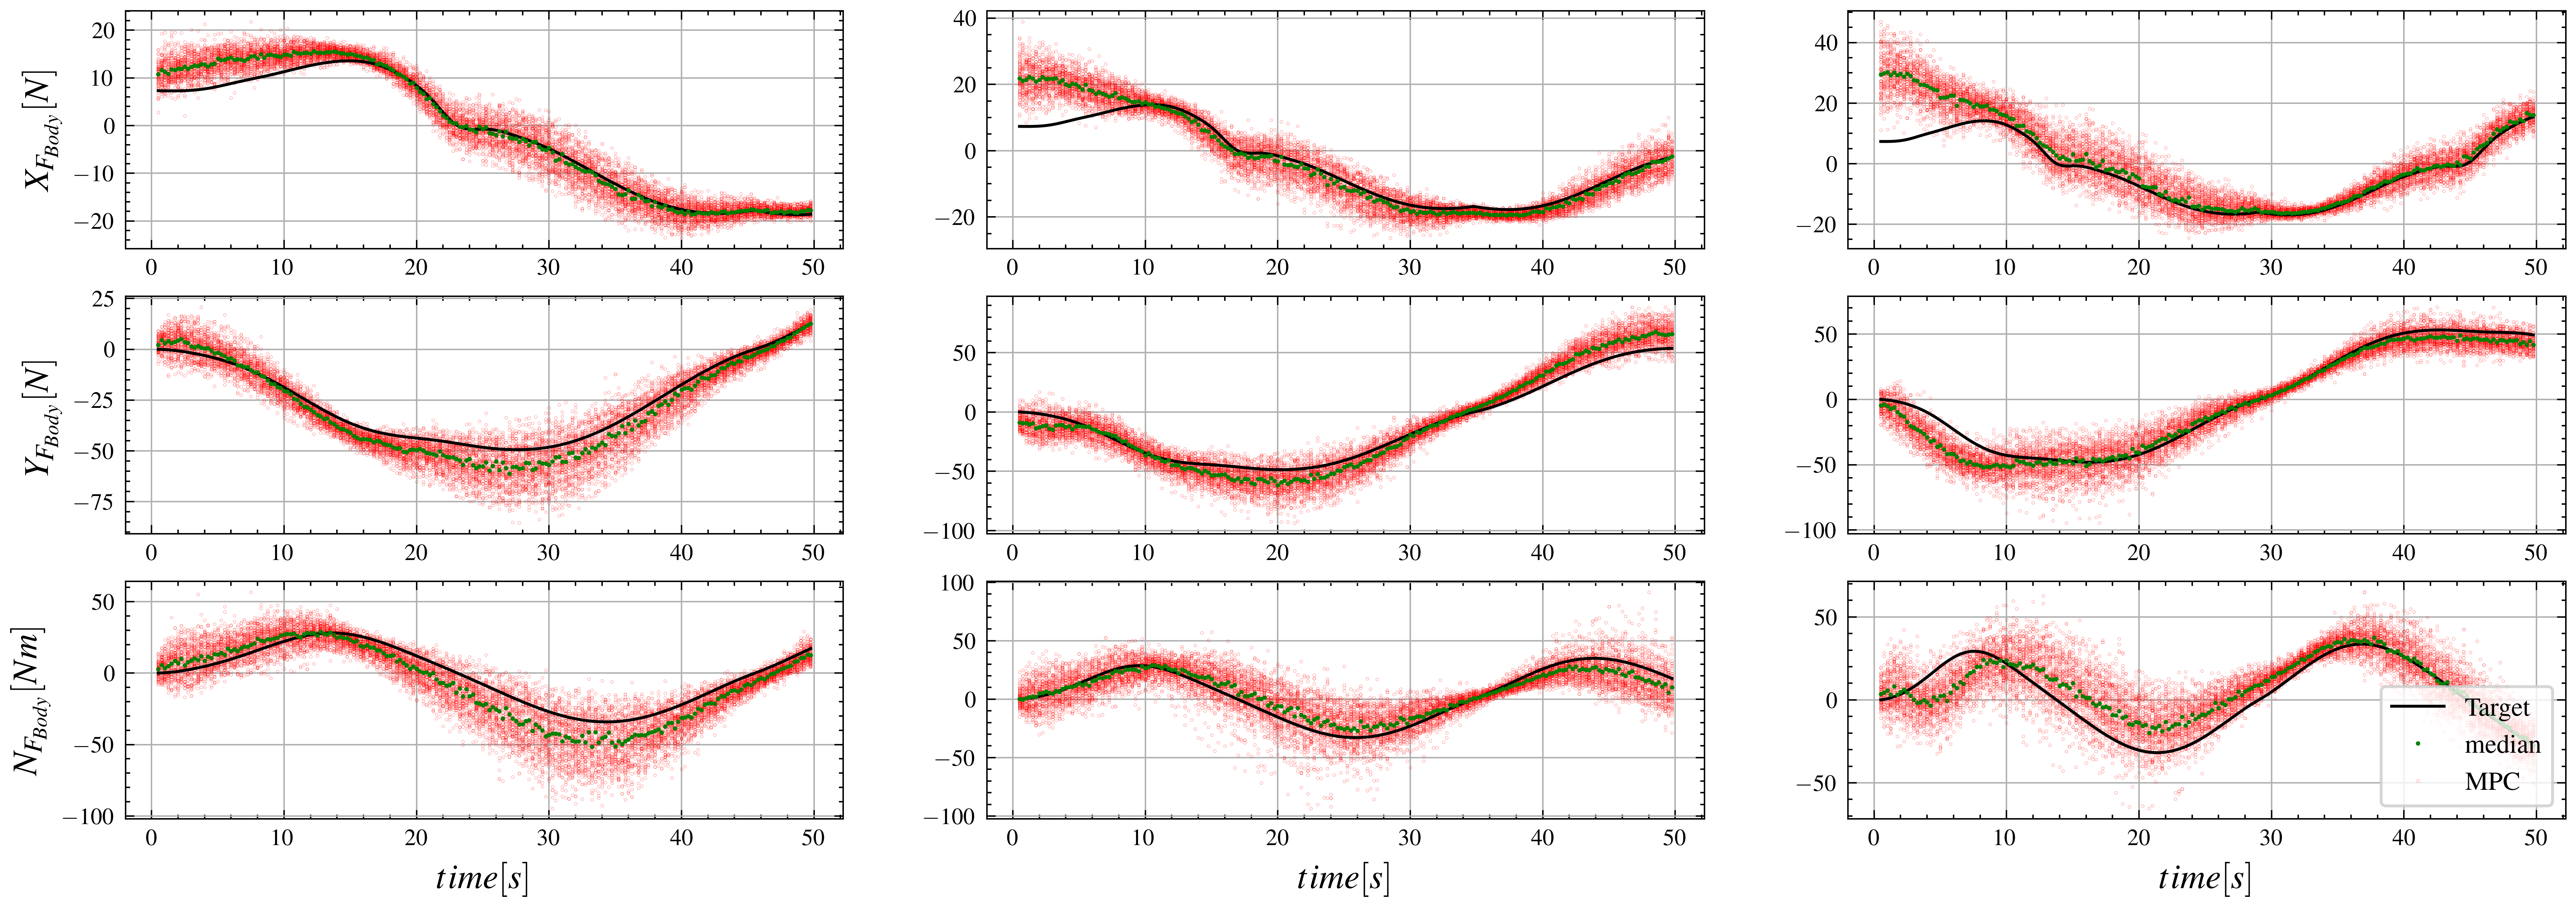

In [139]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(3, 3, 1)
for q in 1:number
    ax1.plot(data1[q][data_start:data_end,"time"], data1[q][data_start:data_end,"X_F"], ".", color="r", markersize=0.1) 
end
ax1.plot(obs10deg[obs_start:obs_end,"time"], obs10deg[obs_start:obs_end,"X_wind"], "-",  c="k", alpha=1.0, linewidth=1) 
# ax1.plot(obs10deg[obs_start:obs_end,"time"], x_F1[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
ax1.plot(obs10deg[obs_start:obs_end,"time"], x_F1[obs_start:obs_end,2], ".", c="g", markersize=1, alpha = 1)
ax1.set_ylabel(L"X_{F_{Body}}[N]", fontsize=12)
ax1.grid()

ax2 = fig.add_subplot(3, 3, 4)
for q in 1:number
    ax2.plot(data1[q][data_start:data_end,"time"], data1[q][data_start:data_end,"Y_F"], ".", color="r", markersize=0.1)
end
ax2.plot(obs10deg[obs_start:obs_end,"time"], obs10deg[obs_start:obs_end,"Y_wind"], "-", c="k", alpha=1, linewidth=1)
# ax2.plot(obs10deg[obs_start:obs_end,"time"], y_F1[obs_start:obs_end,1], "v",c="b", markersize=1, alpha = 1)
ax2.plot(obs10deg[obs_start:obs_end,"time"], y_F1[obs_start:obs_end,2], ".",  c="g", markersize=1, alpha = 1)
ax2.set_ylabel(L"Y_{F_{Body}}[N]", fontsize=12)
ax2.grid()

ax3 = fig.add_subplot(3, 3, 7)
for q in 1:number
    ax3.plot(data1[q][data_start:data_end,"time"], data1[q][data_start:data_end,"N_F"], ".", color="r", markersize=0.1)
end
ax3.plot(obs10deg[obs_start:obs_end,"time"], obs10deg[obs_start:obs_end,"N_wind"], "-", c="k", alpha=1, linewidth=1)
# ax3.plot(obs10deg[obs_start:obs_end,"time"], n_F1[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
ax3.plot(obs10deg[obs_start:obs_end,"time"], n_F1[obs_start:obs_end,2], ".",  c="g", markersize=1, alpha = 1)
ax3.plot(data1[1][data_start:data_end,"time"], data1[1][data_start:data_end,"N_F"], ".", color="r", markersize=0.1)
ax3.set_ylabel(L"N_{F_{Body}}[Nm]", fontsize=12)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)

ax1 = fig.add_subplot(3, 3, 2)
for q in 1:number
    ax1.plot(data2[q][data_start:data_end,"time"], data2[q][data_start:data_end,"X_F"], ".", color="r", markersize=0.1) 
end
ax1.plot(obs20deg[obs_start:obs_end,"time"], obs20deg[obs_start:obs_end,"X_wind"], "-",  c="k", alpha=1.0, linewidth=1) 
# ax1.plot(obs20deg[obs_start:obs_end,"time"], x_F2[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
ax1.plot(obs20deg[obs_start:obs_end,"time"], x_F2[obs_start:obs_end,2], ".",  c="g", markersize=1, alpha = 1)
ax1.grid()

ax2 = fig.add_subplot(3, 3, 5)
for q in 1:number
    ax2.plot(data2[q][data_start:data_end,"time"], data2[q][data_start:data_end,"Y_F"], ".", color="r", markersize=0.1)
end
ax2.plot(obs20deg[obs_start:obs_end,"time"], obs20deg[obs_start:obs_end,"Y_wind"], "-", c="k", alpha=1, linewidth=1)
# ax2.plot(obs20deg[obs_start:obs_end,"time"], y_F2[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
ax2.plot(obs20deg[obs_start:obs_end,"time"], y_F2[obs_start:obs_end,2], ".", c="g", markersize=1, alpha = 1)
ax2.grid()

ax3 = fig.add_subplot(3, 3, 8)
for q in 1:number
    ax3.plot(data2[q][data_start:data_end,"time"], data2[q][data_start:data_end,"N_F"], ".", color="r", markersize=0.1)
end
ax3.plot(obs20deg[obs_start:obs_end,"time"], obs20deg[obs_start:obs_end,"N_wind"], "-", c="k", alpha=1, linewidth=1)
# ax3.plot(obs20deg[obs_start:obs_end,"time"], n_F2[obs_start:obs_end,1], "v", c="b", markersize=1, alpha = 1)
ax3.plot(obs20deg[obs_start:obs_end,"time"], n_F2[obs_start:obs_end,2], ".", c="g", markersize=1, alpha = 1)
ax3.plot(data2[1][data_start:data_end,"time"], data2[1][data_start:data_end,"N_F"], ".", color="r", markersize=0.1)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)

ax1 = fig.add_subplot(3, 3, 3)
for q in 1:number
    ax1.plot(data3[q][data_start:data_end,"time"], data3[q][data_start:data_end,"X_F"], ".", color="r", markersize=0.1) 
end
ax1.plot(obs35deg[obs_start:obs_end,"time"], obs35deg[obs_start:obs_end,"X_wind"], "-",  c="k", alpha=1.0, linewidth=1) 
# ax1.plot(obs35deg[obs_start:obs_end,"time"], x_F3[obs_start:obs_end,1], "v", label="average", c="b", markersize=1, alpha = 1)
ax1.plot(obs35deg[obs_start:obs_end,"time"], x_F3[obs_start:obs_end,2], ".", label="median", c="g", markersize=1, alpha = 1)
ax1.grid()

ax2 = fig.add_subplot(3, 3, 6)
for q in 1:number
    ax2.plot(data3[q][data_start:data_end,"time"], data3[q][data_start:data_end,"Y_F"], ".", color="r", markersize=0.1)
end
ax2.plot(obs35deg[obs_start:obs_end,"time"], obs35deg[obs_start:obs_end,"Y_wind"], "-", c="k", alpha=1, linewidth=1)
# ax2.plot(obs35deg[obs_start:obs_end,"time"], y_F3[obs_start:obs_end,1], "v", label="average", c="b", markersize=1, alpha = 1)
ax2.plot(obs35deg[obs_start:obs_end,"time"], y_F3[obs_start:obs_end,2], ".", label="median", c="g", markersize=1, alpha = 1)
ax2.grid()

ax3 = fig.add_subplot(3, 3, 9)
for q in 1:number
    ax3.plot(data3[q][data_start:data_end,"time"], data3[q][data_start:data_end,"N_F"], ".", color="r", markersize=0.1)
end
ax3.plot(obs35deg[obs_start:obs_end,"time"], obs35deg[obs_start:obs_end,"N_wind"], "-", label="Target", c="k", alpha=1, linewidth=1)
# ax3.plot(obs35deg[obs_start:obs_end,"time"], n_F3[obs_start:obs_end,1], "v", label="average", c="b", markersize=1, alpha = 1)
ax3.plot(obs35deg[obs_start:obs_end,"time"], n_F3[obs_start:obs_end,2], ".", label="median", c="g", markersize=1, alpha = 1)
ax3.plot(data3[1][data_start:data_end,"time"], data3[1][data_start:data_end,"N_F"], ".", color="r", markersize=0.1, label="MPC")
ax3.grid()
ax3.legend(frameon=true, loc="lower right", fontsize=9)
ax3.set_xlabel(L"time[s]", fontsize=12)

display(fig)

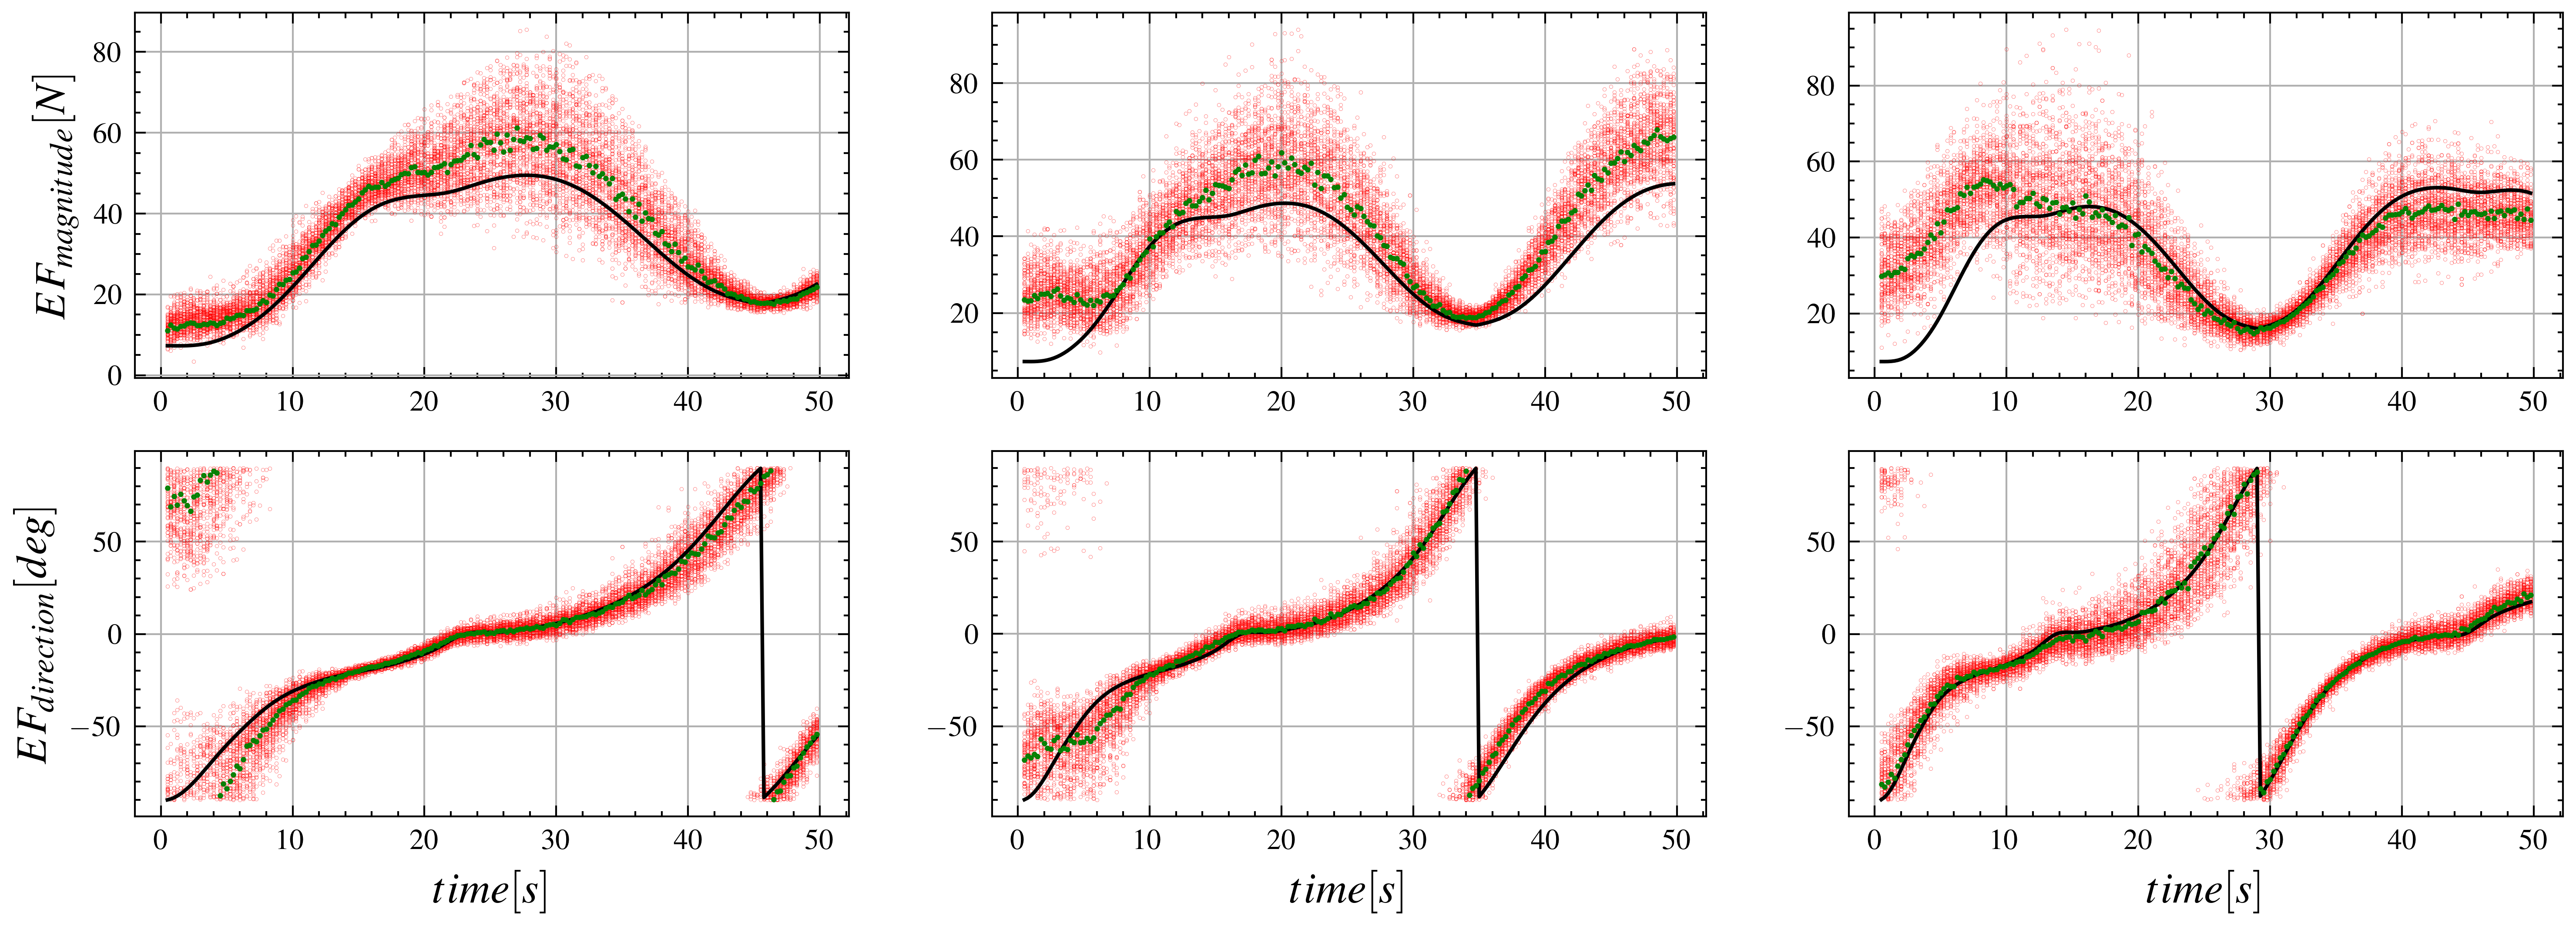

In [141]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(2, 3, 1)
for q in 1:number
    ax1.plot(data1[q][data_start:data_end,"time"], sqrt.(data1[q][data_start:data_end,"X_F"].^2 .+ data1[q][data_start:data_end,"Y_F"].^2), ".", color="r", markersize=0.1) 
end
ax1.plot(obs10deg[obs_start:obs_end,"time"], sqrt.(obs10deg[obs_start:obs_end,"X_wind"].^2 .+ obs10deg[obs_start:obs_end,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
# ax1.plot(obs10deg[obs_start:obs_end,"time"], sqrt.(x_F1[obs_start:obs_end,1].^2 .+ y_F1[obs_start:obs_end,1].^2), "v", label="average", c="b", markersize=1, alpha = 1)
ax1.plot(obs10deg[obs_start:obs_end,"time"], sqrt.(x_F1[obs_start:obs_end,2].^2 .+ y_F1[obs_start:obs_end,2].^2), ".", label="median", c="g", markersize=1, alpha = 1)
ax1.set_ylabel(L"EF_{magnitude}[N]", fontsize=12)
ax1.grid()

ax2 = fig.add_subplot(2, 3, 4)
for q in 1:number
    ax2.plot(data1[q][data_start:data_end,"time"], atan.(data1[q][data_start:data_end,"X_F"]./data1[q][data_start:data_end,"Y_F"])./pi.*180, ".", color="r", markersize=0.1)
end
ax2.plot(obs10deg[obs_start:obs_end,"time"], atan.(obs10deg[obs_start:obs_end,"X_wind"]./obs10deg[obs_start:obs_end,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
# ax2.plot(obs10deg[obs_start:obs_end,"time"], atan.(x_F1[obs_start:obs_end,1]./y_F1[obs_start:obs_end,1])./pi.*180, "v", label="average", c="b", markersize=1, alpha = 1)
ax2.plot(obs10deg[obs_start:obs_end,"time"], atan.(x_F1[obs_start:obs_end,2]./y_F1[obs_start:obs_end,2])./pi.*180, ".", label="median", c="g", markersize=1, alpha = 1)
ax2.set_ylabel(L"EF_{direction}[deg]", fontsize=12)
ax2.set_xlabel(L"time[s]", fontsize=12)
ax2.grid()

ax1 = fig.add_subplot(2, 3, 2)
for q in 1:number
    ax1.plot(data2[q][data_start:data_end,"time"], sqrt.(data2[q][data_start:data_end,"X_F"].^2 .+ data2[q][data_start:data_end,"Y_F"].^2), ".", color="r", markersize=0.1) 
end
ax1.plot(obs20deg[obs_start:obs_end,"time"], sqrt.(obs20deg[obs_start:obs_end,"X_wind"].^2 .+ obs20deg[obs_start:obs_end,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
# ax1.plot(obs20deg[obs_start:obs_end,"time"], sqrt.(x_F2[obs_start:obs_end,1].^2 .+ y_F2[obs_start:obs_end,1].^2), "v", label="average", c="b", markersize=1, alpha = 1)
ax1.plot(obs20deg[obs_start:obs_end,"time"], sqrt.(x_F2[obs_start:obs_end,2].^2 .+ y_F2[obs_start:obs_end,2].^2), ".", label="median", c="g", markersize=1, alpha = 1)
ax1.grid()

ax2 = fig.add_subplot(2, 3, 5)
for q in 1:number
    ax2.plot(data2[q][data_start:data_end,"time"], atan.(data2[q][data_start:data_end,"X_F"]./data2[q][data_start:data_end,"Y_F"])./pi.*180, ".", color="r", markersize=0.1)
end
ax2.plot(obs20deg[obs_start:obs_end,"time"], atan.(obs20deg[obs_start:obs_end,"X_wind"]./obs20deg[obs_start:obs_end,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
# ax2.plot(obs20deg[obs_start:obs_end,"time"], atan.(x_F2[obs_start:obs_end,1]./y_F2[obs_start:obs_end,1])./pi.*180, "v", label="average", c="b", markersize=1, alpha = 1)
ax2.plot(obs20deg[obs_start:obs_end,"time"], atan.(x_F2[obs_start:obs_end,2]./y_F2[obs_start:obs_end,2])./pi.*180, ".", label="median", c="g", markersize=1, alpha = 1)
ax2.set_xlabel(L"time[s]", fontsize=12)
ax2.grid()

ax1 = fig.add_subplot(2, 3, 3)
for q in 1:number
    ax1.plot(data3[q][data_start:data_end,"time"], sqrt.(data3[q][data_start:data_end,"X_F"].^2 .+ data3[q][data_start:data_end,"Y_F"].^2), ".", color="r", markersize=0.1) 
end
ax1.plot(obs35deg[obs_start:obs_end,"time"], sqrt.(obs35deg[obs_start:obs_end,"X_wind"].^2 .+ obs35deg[obs_start:obs_end,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
# ax1.plot(obs35deg[obs_start:obs_end,"time"], sqrt.(x_F3[obs_start:obs_end,1].^2 .+ y_F3[obs_start:obs_end,1].^2), "v", label="average", c="b", markersize=1, alpha = 1)
ax1.plot(obs35deg[obs_start:obs_end,"time"], sqrt.(x_F3[obs_start:obs_end,2].^2 .+ y_F3[obs_start:obs_end,2].^2), ".", label="median", c="g", markersize=1, alpha = 1)
ax1.grid()

ax2 = fig.add_subplot(2, 3, 6)
for q in 1:number
    ax2.plot(data3[q][data_start:data_end,"time"], atan.(data3[q][data_start:data_end,"X_F"]./data3[q][data_start:data_end,"Y_F"])./pi.*180, ".", color="r", markersize=0.1)
end
ax2.plot(obs35deg[obs_start:obs_end,"time"], atan.(obs35deg[obs_start:obs_end,"X_wind"]./obs35deg[obs_start:obs_end,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
# ax2.plot(obs35deg[obs_start:obs_end,"time"], atan.(x_F3[obs_start:obs_end,1]./y_F3[obs_start:obs_end,1])./pi.*180, "v", label="average", c="b", markersize=1, alpha = 1)
ax2.plot(obs35deg[obs_start:obs_end,"time"], atan.(x_F3[obs_start:obs_end,2]./y_F3[obs_start:obs_end,2])./pi.*180, ".", label="median", c="g", markersize=1, alpha = 1)
ax2.set_xlabel(L"time[s]", fontsize=12)
ax2.grid()
display(fig)

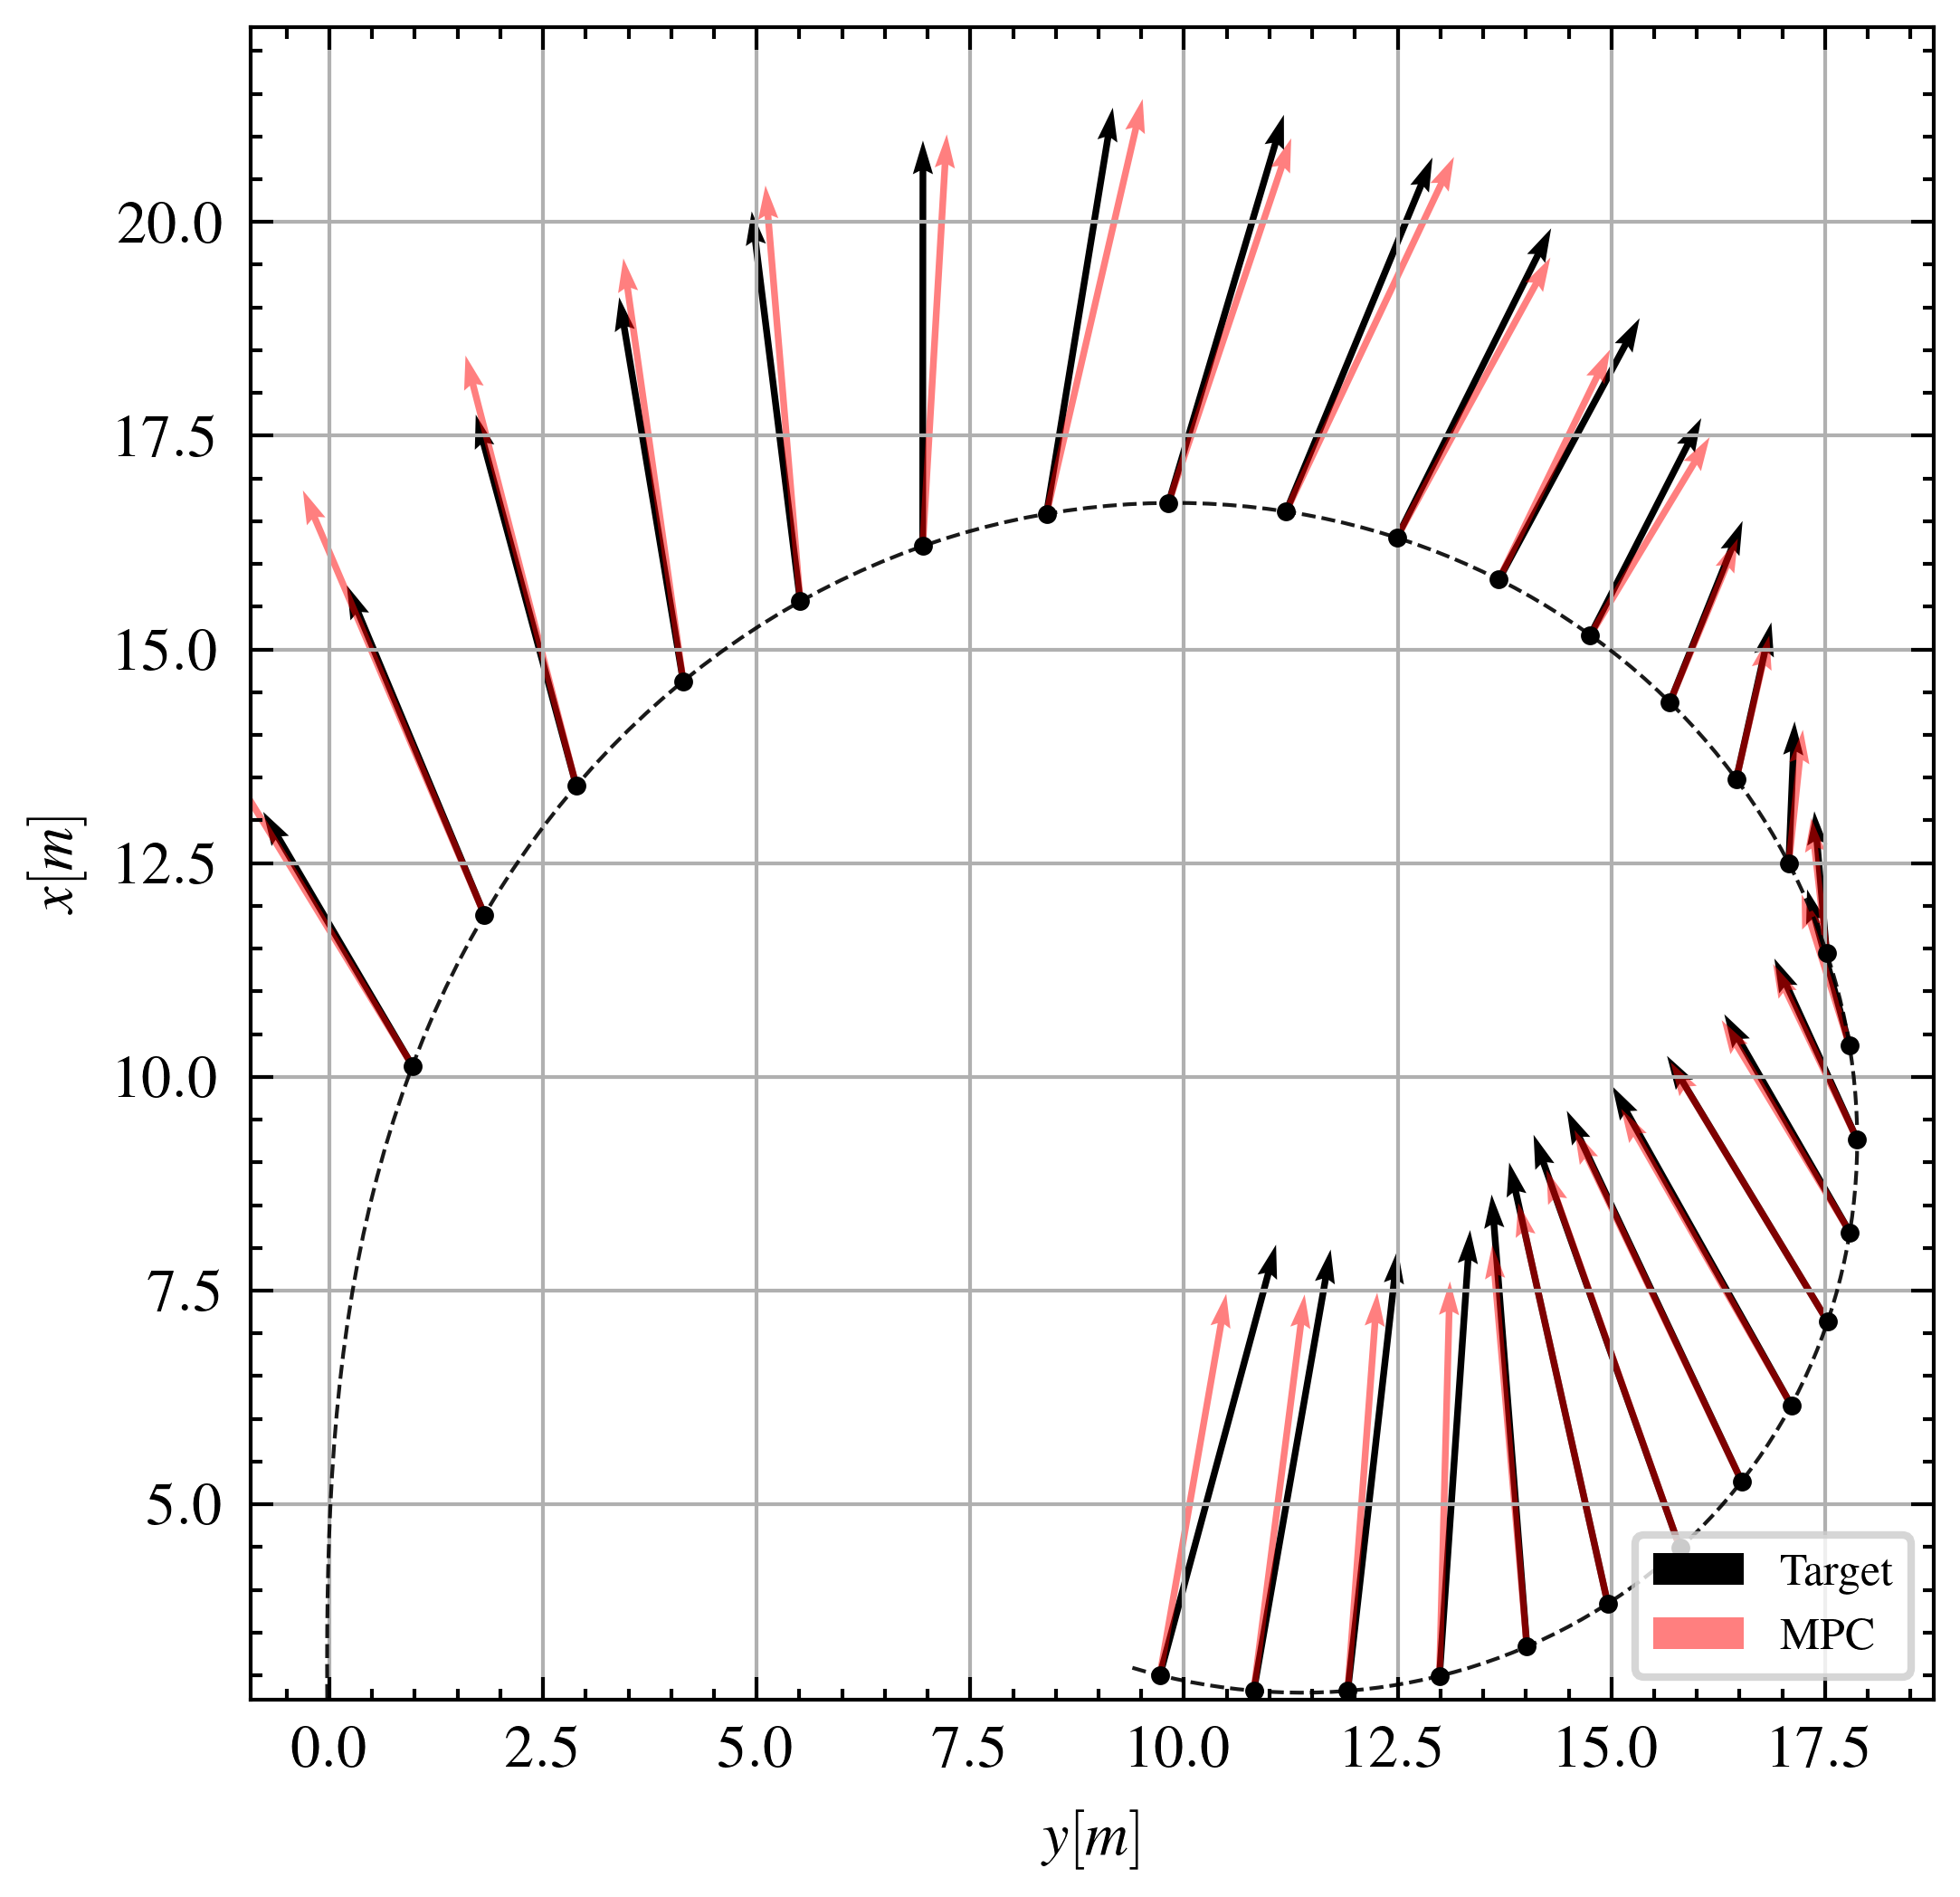

In [136]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1, 1, 1)
skip = 6
scale = 10
width = 0.004
alpha = 1
start = 30
ax.quiver(obs[start:skip:whole_step,"y"], obs[start:skip:whole_step,"x"], obs[start:skip:whole_step,"Y_wind"].*cos.(obs[start:skip:whole_step,"ψ"]).+obs[start:skip:whole_step,"X_wind"].*sin.(obs[start:skip:whole_step,"ψ"]), .-obs[start:skip:whole_step,"Y_wind"].*sin.(obs[start:skip:whole_step,"ψ"])+obs[start:skip:whole_step,"X_wind"].*cos.(obs[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width,color="k", alpha=alpha, label="Target")
# ax.quiver(obs[start:skip:whole_step,"y"], obs[start:skip:whole_step,"x"], obs[start:skip:whole_step,"Y_F"].*cos.(obs[start:skip:whole_step,"ψ"]).+obs[start:skip:whole_step,"X_F"].*sin.(obs[start:skip:whole_step,"ψ"]), .-obs[start:skip:whole_step,"Y_F"].*sin.(obs[start:skip:whole_step,"ψ"])+obs[start:skip:whole_step,"X_F"].*cos.(obs[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width,color="navy", alpha=alpha, label="Target")
ax.quiver(obs[start:skip:whole_step,"y"], obs[start:skip:whole_step,"x"], y_F[start:skip:whole_step,1].*cos.(obs[start:skip:whole_step,"ψ"]).+x_F[start:skip:whole_step,1].*sin.(obs[start:skip:whole_step,"ψ"]), .-y_F[start:skip:whole_step,1].*sin.(obs[start:skip:whole_step,"ψ"])+x_F[start:skip:whole_step,1].*cos.(obs[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width,color="red", alpha=0.5, label="MPC")
ax.plot(obs[1:whole_step,"y"], obs[1:whole_step,"x"], "--", c="k", alpha=0.9, linewidth=0.5)
ax.plot(obs[start:skip:whole_step,"y"], obs[start:skip:whole_step,"x"], ".", c="k", markersize=3)
ax.set_ylabel(L"x[m]", fontsize=8)
ax.set_xlabel(L"y[m]", fontsize=8)
ax.legend(frameon=true, loc="lower right", fontsize=6)
ax.axis("equal")
ax.set_ylim(-1,26)
ax.grid()
display(fig)